### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


In [3]:
import pandas as pd

# URLs dos CSVs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Ler e adicionar a coluna 'Loja' em cada DataFrame
loja1 = pd.read_csv(url1)
loja1["Loja"] = "Loja 1"

loja2 = pd.read_csv(url2)
loja2["Loja"] = "Loja 2"

loja3 = pd.read_csv(url3)
loja3["Loja"] = "Loja 3"

loja4 = pd.read_csv(url4)
loja4["Loja"] = "Loja 4"

# Unir todos os DataFrames
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Verificar se colunas estão padronizadas
df.columns = df.columns.str.strip()

# Agrupar e somar o faturamento por loja
faturamento_por_loja = df.groupby("Loja")["Preço"].sum().reset_index()

# Formatando com 2 casas decimais e R$
faturamento_por_loja["Preço"] = faturamento_por_loja["Preço"].map(lambda x: f'R$ {x:,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."))

# Exibir resultado
print(faturamento_por_loja)


     Loja            Preço
0  Loja 1  R$ 1.534.509,12
1  Loja 2  R$ 1.488.459,06
2  Loja 3  R$ 1.464.025,03
3  Loja 4  R$ 1.384.497,58


# 2. Vendas por Categoria


In [4]:
import pandas as pd

# URLs dos CSVs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Ler e adicionar a coluna 'Loja' em cada DataFrame
loja1 = pd.read_csv(url1)
loja1["Loja"] = "Loja 1"

loja2 = pd.read_csv(url2)
loja2["Loja"] = "Loja 2"

loja3 = pd.read_csv(url3)
loja3["Loja"] = "Loja 3"

loja4 = pd.read_csv(url4)
loja4["Loja"] = "Loja 4"

# Unir todos os DataFrames
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Padronizar nomes de colunas
df.columns = df.columns.str.strip()

# Agrupar por categoria e somar faturamento
faturamento_por_categoria = df.groupby("Categoria do Produto")["Preço"].sum().reset_index()

# Ordenar do maior para o menor faturamento
faturamento_por_categoria = faturamento_por_categoria.sort_values(by="Preço", ascending=False)

# Formatando com R$ e duas casas decimais
faturamento_por_categoria["Preço"] = faturamento_por_categoria["Preço"].map(lambda x: f'R$ {x:,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."))

# Exibir resultado
print(faturamento_por_categoria)


    Categoria do Produto            Preço
2            eletronicos  R$ 2.214.099,72
1       eletrodomesticos  R$ 1.766.337,03
6                 moveis  R$ 1.010.214,00
4  instrumentos musicais    R$ 465.029,67
3        esporte e lazer    R$ 190.635,39
0             brinquedos     R$ 98.140,86
7  utilidades domesticas     R$ 76.773,38
5                 livros     R$ 50.260,74


# 3. Média de Avaliação das Lojas

In [5]:
import pandas as pd

# URLs dos CSVs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Ler e adicionar a coluna 'Loja' em cada DataFrame
loja1 = pd.read_csv(url1)
loja1["Loja"] = "Loja 1"

loja2 = pd.read_csv(url2)
loja2["Loja"] = "Loja 2"

loja3 = pd.read_csv(url3)
loja3["Loja"] = "Loja 3"

loja4 = pd.read_csv(url4)
loja4["Loja"] = "Loja 4"

# Unir todos os DataFrames
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Padronizar nomes de colunas
df.columns = df.columns.str.strip()

# Agrupar por categoria e calcular a média de avaliação
media_avaliacao_por_categoria = df.groupby("Categoria do Produto")["Avaliação da compra"].mean().reset_index()

# Ordenar do maior para o menor valor de média
media_avaliacao_por_categoria = media_avaliacao_por_categoria.sort_values(by="Avaliação da compra", ascending=False)

# Formatando a média com duas casas decimais
media_avaliacao_por_categoria["Avaliação da compra"] = media_avaliacao_por_categoria["Avaliação da compra"].map(lambda x: f'{x:.2f}'.replace(".", ","))

# Exibir resultado
print(media_avaliacao_por_categoria)


    Categoria do Produto Avaliação da compra
0             brinquedos                4,07
6                 moveis                4,03
1       eletrodomesticos                4,01
5                 livros                4,00
4  instrumentos musicais                4,00
2            eletronicos                3,99
3        esporte e lazer                3,99
7  utilidades domesticas                3,98


# 4. Produtos Mais e Menos Vendidos

In [16]:
import pandas as pd

# URLs dos arquivos CSV das lojas
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Leitura dos dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Combinar todos os dados
df = pd.concat([loja1, loja2, loja3, loja4])
df.columns = [col.strip() for col in df.columns]  # limpar espaços

# Contagem de produtos
contagem_produtos = df["Produto"].value_counts().reset_index()
contagem_produtos.columns = ["Produto", "Quantidade Vendida"]

# Formatar como tabela de texto
print("\nTop 5 Produtos Mais Vendidos:\n")
print(contagem_produtos.head(5).to_string(index=False))

print("\nTop 5 Produtos Menos Vendidos:\n")
print(contagem_produtos.tail(5).to_string(index=False))




Top 5 Produtos Mais Vendidos:

                 Produto  Quantidade Vendida
                  Cômoda                 210
Carrinho controle remoto                 206
             Micro-ondas                 206
                 Bateria                 203
               Cama king                 201

Top 5 Produtos Menos Vendidos:

                    Produto  Quantidade Vendida
Ciência de dados com python                 166
                   Guitarra                 165
                    Mochila                 163
                    Headset                 158
               Celular ABXY                 157


# 5. Frete Médio por Loja


In [7]:
import pandas as pd

# URLs dos CSVs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Ler e adicionar a coluna 'Loja' em cada DataFrame
loja1 = pd.read_csv(url1)
loja1["Loja"] = "Loja 1"

loja2 = pd.read_csv(url2)
loja2["Loja"] = "Loja 2"

loja3 = pd.read_csv(url3)
loja3["Loja"] = "Loja 3"

loja4 = pd.read_csv(url4)
loja4["Loja"] = "Loja 4"

# Unir todos os DataFrames
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Padronizar nomes de colunas
df.columns = df.columns.str.strip()

# Calcular frete médio por loja
frete_medio_por_loja = df.groupby("Loja")["Frete"].mean().reset_index()

# Exibir o resultado
print("Frete Médio por Loja:")
print(frete_medio_por_loja)


Frete Médio por Loja:
     Loja      Frete
0  Loja 1  34.691805
1  Loja 2  33.621941
2  Loja 3  33.074464
3  Loja 4  31.278997


Gráfico para comparação do faturamento por loja

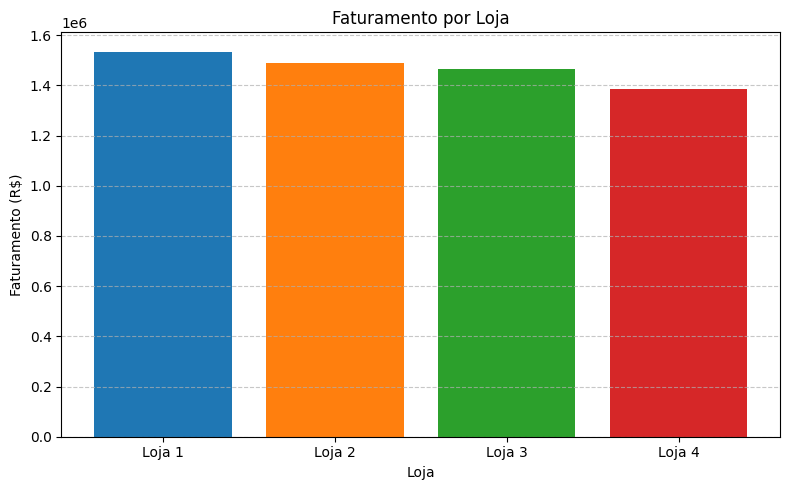

In [9]:

import pandas as pd
import matplotlib.pyplot as plt

# URLs dos arquivos CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar os dados e adicionar a coluna 'Loja'
loja1 = pd.read_csv(url1)
loja1["Loja"] = "Loja 1"

loja2 = pd.read_csv(url2)
loja2["Loja"] = "Loja 2"

loja3 = pd.read_csv(url3)
loja3["Loja"] = "Loja 3"

loja4 = pd.read_csv(url4)
loja4["Loja"] = "Loja 4"

# Combinar todos os DataFrames
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Padronizar os nomes das colunas
df.columns = df.columns.str.strip()

# Calcular faturamento (soma da coluna Preço) por loja
faturamento = df.groupby("Loja")["Preço"].sum().reset_index()

# Lista de cores diferentes para cada barra
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # azul, laranja, verde, vermelho

# Criar gráfico de barras com cores diferentes
plt.figure(figsize=(8, 5))
plt.bar(faturamento["Loja"], faturamento["Preço"], color=cores)
plt.title("Faturamento por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()


Gráfico para comparação de produtos mais vendidos

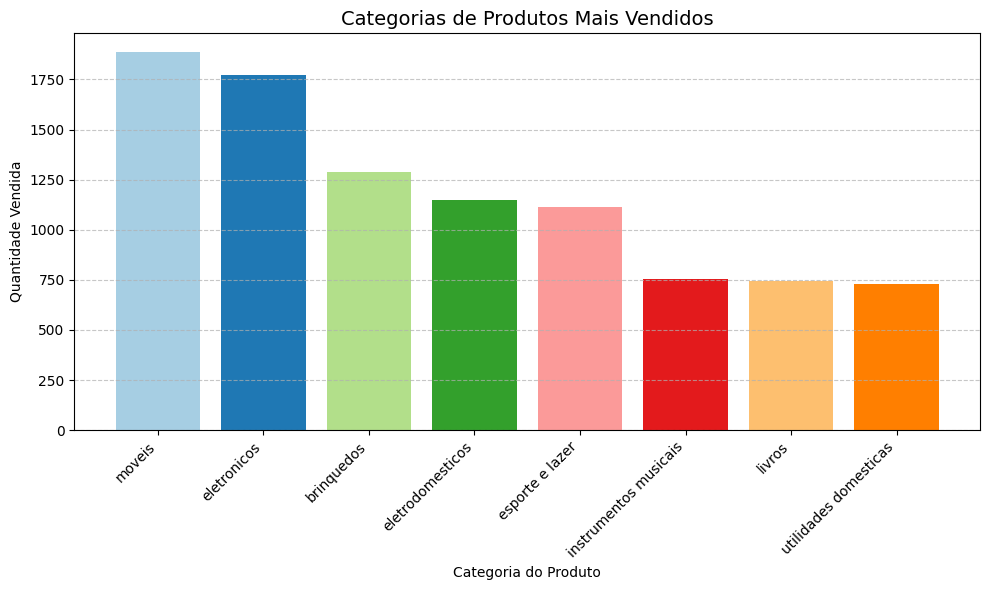

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs dos arquivos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar os dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Juntar os dados em um único DataFrame
df = pd.concat([loja1, loja2, loja3, loja4])

# Padronizar nomes de colunas
df.columns = [col.strip() for col in df.columns]

# Contar a quantidade de vendas por categoria de produto
vendas_categoria = df['Categoria do Produto'].value_counts().reset_index()
vendas_categoria.columns = ['Categoria do Produto', 'Quantidade Vendida']

# Plotar o gráfico de barras coloridas
plt.figure(figsize=(10, 6))
bars = plt.bar(vendas_categoria['Categoria do Produto'], vendas_categoria['Quantidade Vendida'], color=plt.cm.Paired.colors)

plt.title("Categorias de Produtos Mais Vendidos", fontsize=14)
plt.xlabel("Categoria do Produto")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


Gráfico para comparação dos produtos mais e menos vendidos

<ipython-input-15-277e5b8a30ee>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(mais_vendidos['Produto'], rotation=45, ha='right')
<ipython-input-15-277e5b8a30ee>:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(menos_vendidos['Produto'], rotation=45, ha='right')


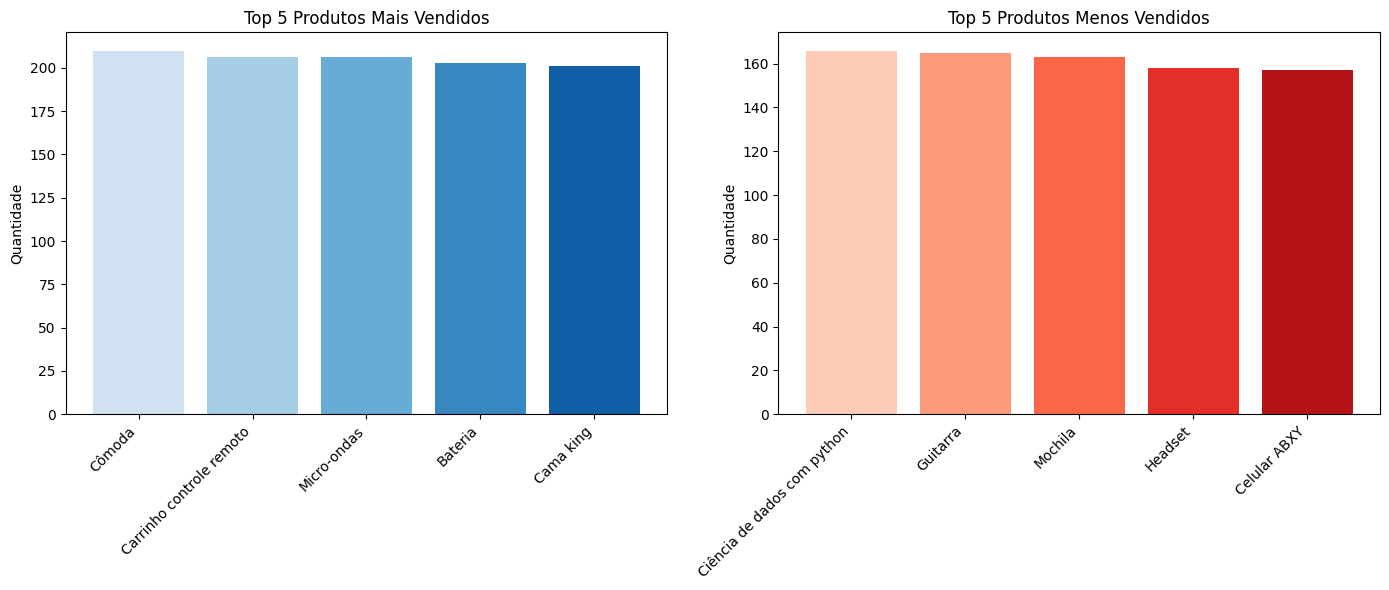

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs dos arquivos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar os dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Concatenar os DataFrames
df = pd.concat([loja1, loja2, loja3, loja4])
df.columns = [col.strip() for col in df.columns]

# Contagem de vendas por produto
vendas_produtos = df['Produto'].value_counts()

# Selecionar os 5 mais vendidos
mais_vendidos = vendas_produtos.head(5).reset_index()
mais_vendidos.columns = ['Produto', 'Quantidade']

# Selecionar os 5 menos vendidos
menos_vendidos = vendas_produtos.tail(5).reset_index()
menos_vendidos.columns = ['Produto', 'Quantidade']

# Plotar os gráficos
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Mais vendidos
axs[0].bar(mais_vendidos['Produto'], mais_vendidos['Quantidade'], color=plt.cm.Blues(range(50, 250, 40)))
axs[0].set_title("Top 5 Produtos Mais Vendidos")
axs[0].set_ylabel("Quantidade")
axs[0].set_xticklabels(mais_vendidos['Produto'], rotation=45, ha='right')

# Menos vendidos
axs[1].bar(menos_vendidos['Produto'], menos_vendidos['Quantidade'], color=plt.cm.Reds(range(50, 250, 40)))
axs[1].set_title("Top 5 Produtos Menos Vendidos")
axs[1].set_ylabel("Quantidade")
axs[1].set_xticklabels(menos_vendidos['Produto'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


Gráfico para comparação do frete médio por loja

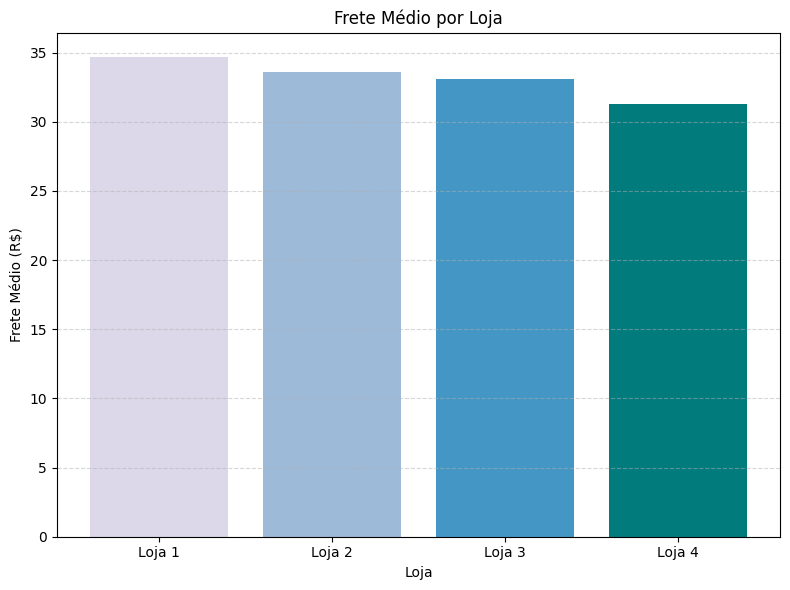

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs dos arquivos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar os dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionar coluna com nome da loja
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenar os DataFrames
df = pd.concat([loja1, loja2, loja3, loja4])
df.columns = [col.strip() for col in df.columns]

# Calcular frete médio por loja
frete_medio = df.groupby('Loja')['Frete'].mean().reset_index()
frete_medio = frete_medio.sort_values(by='Frete', ascending=False)

# Plotar o gráfico
plt.figure(figsize=(8,6))
colors = plt.cm.PuBuGn(range(50, 250, 50))  # Cores variadas
plt.bar(frete_medio['Loja'], frete_medio['Frete'], color=colors)
plt.title("Frete Médio por Loja")
plt.xlabel("Loja")
plt.ylabel("Frete Médio (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Relatório

Com base na análise realizada, a loja com pior desempenho geral é a:

Loja 4

Motivos:

Menor Faturamento Total: Loja 4 teve o menor volume financeiro entre todas.

Avaliação Média Mais Baixa: Isso pode indicar problemas com atendimento, entrega ou qualidade dos produtos.

Baixa Rotatividade de Produtos: Vende menos produtos ou produtos de menor atratividade/valor agregado.


Diante disso, o Sr. João pode optar em vendê-la.
